In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve

Physical constants:

In [13]:
#EAU = 27.2114
IAU = 3.5e16
LAU = 0.052918
TAU = 2.419e-17
alpha = 1. /137
c = 2.998e8  # Speed of light in m/s
#LAU = 5.29177e-11  # Bohr radius in meters
#c = 1/alpha

Define fixed Paramaters:

In [14]:
wavelength = 800e-9 #Wavelength in nm
Int_0 = 4e14 #Intensity in W/cm2
Ip = 0.5 * 13.5984 # Hydrogen gas target ionization potential in eV

omega = 2 * np.pi * LAU * c / wavelength  # Angular frequency
TC = 2 * np.pi / omega  # Optical cycle period

In [15]:
print(omega)

124601976631977.17


Field configurations:

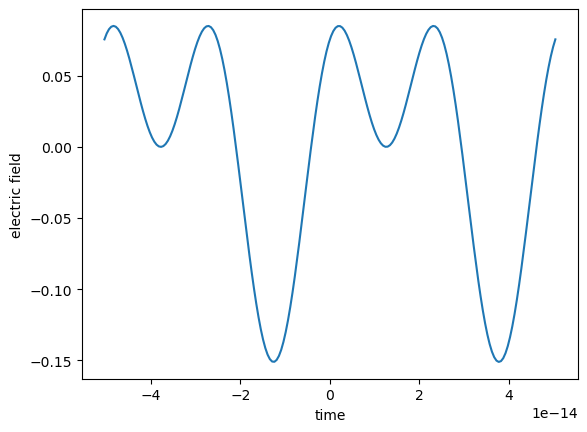

In [10]:
t_list = np.linspace(-TC, TC, 200)  #time list

#define a function for a two-colour field, with mixing angle theta and phase shift phi
def beam(theta, phi, r, s):
    Int_1 = Int_0 * (np.cos(theta))**2  #Intensity of beam 1
    Int_2 = Int_0 * (np.sin(theta))**2  #Intensity of beam 1
    omega_1 = r * omega  #Frequency of beam 1
    omega_2 = s * omega  #Frequency of beam 1

    E_01 = np.sqrt(Int_1 / IAU)  #field strength of beam 1
    E_02 = np.sqrt(Int_2 / IAU)  #field strength of beam 2

    e_field = []  #create empty lists to store electric field values for each point in time

    for i in t_list:
        beam_1 = E_01 * np.sin(omega_1 * i)
        beam_2 = E_02 * np.sin((omega_2 * i) + phi)
        total_beam = beam_1 + beam_2

        e_field.append(total_beam)

    #return e_field
    plt.plot(t_list, e_field, label='two-colour field')
    plt.xlabel("time")
    plt.ylabel("electric field")
    plt.show()

beam(np.pi / 4, np.pi /2, 1, 2)

Create a timespace domain to make initial guesses

In [17]:
realtimes = np.linspace(0, TC, 100)
imagtimes = np.linspace(0, TC/2, 100)

timespace = np.array([realtimes, imagtimes])
#print(timespace)

In [19]:
print(omega)

124601976631977.17


In [21]:
def action_mono(t):
    S_mono = Ip*t + 0.5*p**2*t - (p/omega)*np.cos(omega*t + np.pi/2) + 0.5*t - (1/4*omega)*np.sin(2*omega*t + np.pi)
    dS_dt_mono = Ip + 0.5*p**2 - (p*np.sin(omega*t + np.pi/2)) + 0.5 - (0.5*np.cos(2*omega*t + np.pi))

    return dS_dt_mono

#find saddle points:
ts = fsolve(action_mono, timespace)

print(ts)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

error: Result from function call is not a proper array of floats.